#**Lab Six: Convolutional Network Architectures**

##**1. Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import cv2 
from PIL import Image
import warnings
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',10000)

In [ ]:
import tensorflow as tf
from sklearn import datasets, metrics
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Change directory to personal drive
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
flower_df = pd.read_csv("FlowersDatasetProcessed/flower_df.csv")
# %cd FlowersDatasetProcessed/flowers

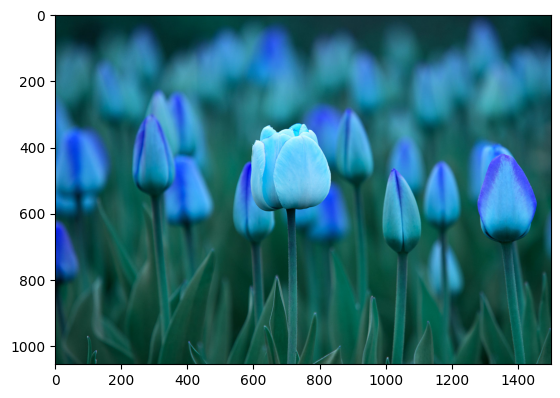

In [ ]:
img = cv2.imread('FlowersDatasetProcessed/flowers_new/tulip_00075.jpg')
plt.imshow(img)

In [ ]:
# Code Used to Resize Original Images
# https://stackoverflow.com/questions/21517879/python-pil-resize-all-images-in-a-folder

path = "FlowersDatasetProcessed/flowers_new/"
save_path ="FlowersDatasetProcessed/modified_flowers/"
flowerdirs = os.listdir( path )
flower_names = []  # create an empty list
flower_type = []
resize_limit=100
channels=3

def resize():
    for item in flowerdirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(save_path+item)
            # print(f)
            imResize = im.resize((resize_limit,resize_limit), Image.ANTIALIAS)
            imResize.save(save_path+f.split('/')[-1].split(' (')[0] + '.jpg', 'JPEG', quality=90)
            flower_names.append(f + '.jpg')
            flower_type.append(f.split("_")[0])
resize()

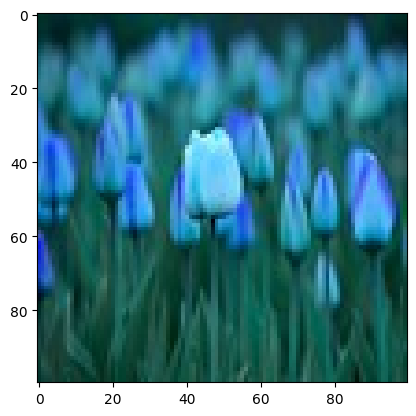

In [ ]:
img = cv2.imread('FlowersDatasetProcessed/modified_flowers/tulip_00075.jpg')
plt.imshow(img)

###**1.1 Extracting Data**

,FileName,Type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,...,29750,29751,29752,29753,29754,29755,29756,29757,29758,29759,29760,29761,29762,29763,29764,29765,29766,29767,29768,29769,29770,29771,29772,29773,29774,29775,29776,29777,29778,29779,29780,29781,29782,29783,29784,29785,29786,29787,29788,29789,29790,29791,29792,29793,29794,29795,29796,29797,29798,29799,29800,29801,29802,29803,29804,29805,29806,29807,29808,29809,29810,29811,29812,29813,29814,29815,29816,29817,29818,29819,29820,29821,29822,29823,29824,29825,29826,29827,29828,29829,29830,29831,29832,29833,29834,29835,29836,29837,29838,29839,29840,29841,29842,29843,29844,29845,29846,29847,29848,29849,29850,29851,29852,29853,29854,29855,29856,29857,29858,29859,29860,29861,29862,29863,29864,29865,29866,29867,29868,29869,29870,29871,29872,29873,29874,29875,29876,29877,29878,29879,29880,29881,29882,29883,29884,29885,29886,29887,29888,29889,29890,29891,29892,29893,29894,29895,29896,29897,29898,29899,29900,29901,29902,29903,29904,29905,29906,29907,29908,29909,29910,29911,29912,29913,29914,29915,29916,29917,29918,29919,29920,29921,29922,29923,29924,29925,29926,29927,29928,29929,29930,29931,29932,29933,29934,29935,29936,29937,29938,29939,29940,29941,29942,29943,29944,29945,29946,29947,29948,29949,29950,29951,29952,29953,29954,29955,29956,29957,29958,29959,29960,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,bougainvillea_00002.jpg,bougainvillea,128,13,106,137,15,115,140,6,118,132,4,115,138,33,130,177,75,176,135,10,133,141,13,138,135,15,126,131,15,115,146,24,124,158,26,132,151,10,127,173,24,152,184,28,169,173,36,158,143,45,121,89,25,67,65,26,52,73,32,64,83,11,81,94,21,89,72,24,53,67,17,49,113,29,107,150,42,141,142,16,122,134,9,118,119,6,120,131,27,134,114,12,107,136,32,127,152,38,152,144,26,145,127,8,117,130,12,113,150,35,132,142,31,129,118,11,120,120,9,125,141,14,137,152,30,136,149,49,121,120,59,93,77,66,62,77,92,65,46,59,33,37,52,24,30,52,24,38,60,35,39,51,31,46,56,39,75,86,70,68,79,63,43,53,36,30,37,22,38,36,28,35,32,28,62,64,65,44,49,50,33,42,39,46,56,44,40,44,25,52,58,33,50,61,35,66,81,54,70,80,57,62,72,49,69,80,60,73,80,65,82,82,76,67,65,64,50,51,47,44,56,44,32,60,37,53,83,58,136,153,139,147,140,145,151,101,141,160,100,148,135,92,129,128,73,118,162,63,...,147,150,75,151,156,80,158,158,85,165,131,57,139,124,47,131,122,36,124,133,46,134,139,53,141,124,40,128,122,39,124,128,39,125,168,69,155,176,78,162,128,40,123,118,34,116,119,32,118,121,29,118,134,34,129,136,36,132,128,29,129,122,23,125,125,26,128,138,39,137,154,55,147,128,36,117,108,30,101,107,43,103,99,46,103,94,43,100,107,49,108,114,45,118,129,47,142,137,44,153,127,25,137,150,51,159,139,54,146,125,62,131,126,89,129,126,107,124,128,113,121,123,114,111,123,118,109,128,110,111,144,92,122,157,88,133,170,99,149,172,125,163,140,142,160,104,129,133,87,105,106,72,91,88,83,108,98,93,124,109,83,114,99,80,112,95,90,112,100,63,82,73,42,56,54,64,77,79,61,71,78,87,92,101,62,52,68,73,60,76,74,58,75,64,48,65,60,43,57,73,56,70,80,63,

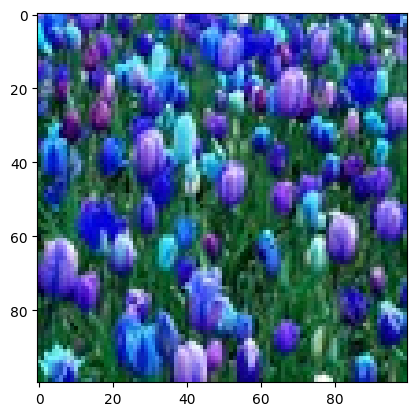

In [ ]:
# Set path for image location
# file_path = "/content/drive/My Drive/flowers/"
file_path = "FlowersDatasetProcessed/modified_flowers/"
# Read in all images
flower_images: pd.DataFrame = flower_df[["FileName", "Type"]]
    
# Scale down images by given percentage of the original size. 
scale_percent = 100
img_dim = resize_limit
width = int(img_dim * scale_percent / 100)
height = int(img_dim * scale_percent / 100)
dim = (width, height)
# print(dim)
flower_images_np = []

for i in np.arange(flower_df.shape[0]):
    img_path = file_path + flower_df["FileName"][i] #+ '.jpg'
    # print(img_path)
    # Read in image
    img = cv2.imread(img_path)
    # print(img)
    #sharpening the image
    kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
    sharp_img = cv2.filter2D(img, -1, kernel)
    # resize image
    img_resized = cv2.resize(sharp_img, dim, interpolation = cv2.INTER_AREA)
    
    # resize image
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    plt.imshow(img_resized)
    # recolor image to grayscale to reduce the size from 3D to 2D
    #img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    # flatten 2D array into a 1D array
    #img_flat = img_gray.reshape((height*width*1))
    img_flat = img_resized.reshape((height*width*channels))
    flower_images_np.append(img_flat)
    # break

# Convert to array
flower_images_arr = np.asarray(flower_images_np)
# Convert to dataframe
flower_images_df = pd.DataFrame(flower_images_arr)
# Merge to metadata
flower_images_full = pd.concat([flower_images, flower_images_df], axis = 1)

flower_images_full.head()

In [ ]:
# X_traindata, X_testdata, y_traindata, y_testdata = train_test_split(flower_images_full.drop(columns =['FileName','Type'],axis=0), flower_images_full[['Type']], test_size=0.2)

###**1.x Metric for Assessing Performance**

Accuracy will be used to evaluate the algorithms performance. In the flowers dataset, there are ten types of flowers: bougainvillea, daisies, garden roses, gardenias, hibiscuses, hydrangeas, lillies, orchids, peonies, and tulips. None represent a "positive" or "negative" class, and it is important to identify all equally. Therefore there is no reason to instead use precision or recall to train the algorithm. 

**I just assumed we're using accuracy... please change if y'all have chosen another metric***

###**1.x Method for Dividing Data**

##**2. Modeling**

###**2.1 Data Augmentation**

The keras ImageGenerator is used as a pre-processing step to expand the dataset. 

A rotation range of 5 was selected to account for slight variations in orientation of future photos. A small value was selected because flower images are usually taken upright, oriented with the flower above the stem. However, there may be some variation due to wilting or artistic perspectives, so a small degree of rotation was taken into account. 

A width shift and height shift of 0.1 was used to vary the alignment of the flower in the photo. Flower photos might not always be captured with the a flower or group of flowers as the single focal point, so it is important to shift the object of interest around the photo frame.  

A zoom range of 0.3 was selected because photos of the flowers may be up close, showing only the flower, or further away, showing multiple flowers or the entire plant. Therefore, it is important to vary the magnitude of the perspective to account for the distance in which future photos may be taken. 

Generated images may be horizontally flipped to account for different angles of future photos. Flowers are typically symmetric across the y-axis so there is no reason that horizontally flipped images would not represent plants in real life. Vertical flip was not used because it is unlikely that a flower photo would be taken upside-down. 

All other arguments are consistent with default values. 

+ Source: https://github.com/eclarson/MachineLearningNotebooks/blob/master/12.%20More%20Advanced%20CNN%20Techniques.ipynb

In [ ]:
img_wh = resize_limit
NUM_CLASSES = 10

X_train = flower_images_full.iloc[:,2:].to_numpy()

le = LabelEncoder()
y_train = le.fit_transform(flower_images_full['Type'])

# Reshape X_train for ImageGenerator
X_train_1 = np.expand_dims(X_train.reshape((-1,img_wh,img_wh)), axis=1) 
# X_train_2 = np.expand_dims(X_train.reshape((-1,img_wh,img_wh, 3)), axis=1)
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)

print(X_train.shape)
print(y_train_ohe.shape)

(733, 30000)
(733, 10)


In [ ]:
datagen = ImageDataGenerator(
     featurewise_center=False,
     samplewise_center=False,
     featurewise_std_normalization=False,
     samplewise_std_normalization=False,
     zca_whitening=False,
     rotation_range=5, # used, Int. Degree range for random rotations.
     width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
     height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
     shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
     zoom_range=0.3,
     channel_shift_range=0.,
     fill_mode='nearest',
     cval=0.,
     horizontal_flip=True,
     vertical_flip=False,
     rescale=None)

datagen.fit(X_train_1)

#### **Examples of Augmented Images**

+ Source: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

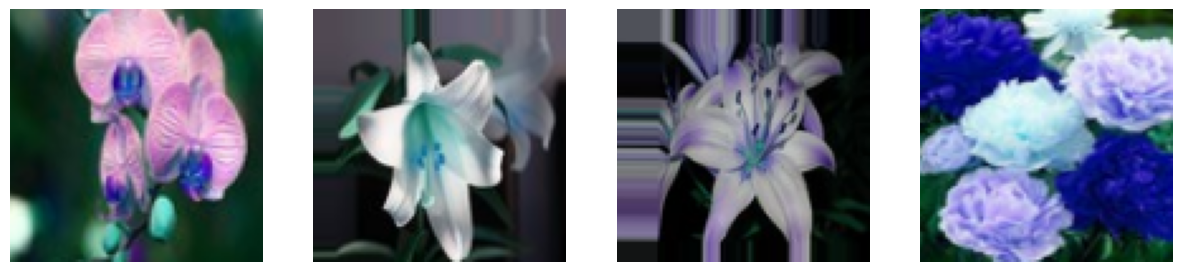

In [ ]:
# iterator
aug_iter = datagen.flow(X_train.reshape((733, resize_limit, resize_limit, channels)), batch_size=10)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

# generate batch of images
for i in range(4):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
 
    # plot image
    ax[i].imshow(image)
    ax[i].axis('off')

#### **Generate Augmented Dataset**

In [ ]:
# iterator
aug_iter = datagen.flow(X_train.reshape((733, resize_limit, resize_limit, channels)), y_train_ohe, batch_size=2)

flower_images_augmented_np = []
flower_images_augmented_y_np = []

# generate batch of images
for i in range(len(aug_iter)):

    # convert to unsigned integers
    image = next(aug_iter)[0].astype('uint8')
    
    # Grab outcome
    flower_images_augmented_y_np.append((next(aug_iter)[1])[0]) 
    # Not sure why the ImageGenerator Object passes a 2-D array for y (?)
    # Have the first array selected as a default
    
    # Flatten
    #img_flat = img_gray.reshape((height*width*1))
    img_flat = img_resized.reshape((height*width*channels))
    flower_images_augmented_np.append(img_flat)
    
    
# Convert to array
flower_images_augmented_arr = np.asarray(flower_images_augmented_np)
flower_images_augmented_y_arr = np.asarray(flower_images_augmented_y_np)

# Concatenate to full dataset 
flower_orig_aug_np = np.concatenate((X_train, flower_images_augmented_arr)) # New X matrix
flower_orig_aug_np_y = np.concatenate((y_train_ohe, flower_images_augmented_y_arr)) # New y matrix

In [ ]:
flower_orig_aug_np[1]

array([146,  54, 160, ..., 106, 120, 143], dtype=uint8)

###**2.2 Implementing CNN on new dataset**

In [ ]:
flower_orig_aug_np=flower_orig_aug_np.reshape((flower_orig_aug_np.shape[0],resize_limit,resize_limit,channels))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flower_orig_aug_np, flower_orig_aug_np_y, test_size=0.3)

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

##mlp

In [ ]:
new_y_test=[]
for val in range(len(y_test)):
  for data in range(len(y_test[val])):
    if int(y_test[val][data])==1:
      new_y_test.append(data)

In [ ]:
def model_1(kernal_size,num_filter,Drop):
    model = Sequential()

    model.add(Conv2D(filters= int(num_filter/2), kernel_size= (kernal_size,kernal_size), strides= 1, activation= 'relu', input_shape= (resize_limit, resize_limit, channels)))
    model.add(BatchNormalization())
    model.add(Dropout(Drop))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(filters= int(num_filter), kernel_size= (kernal_size,kernal_size), strides= 1, activation= 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(Drop))
    model.add(MaxPooling2D())


    model.add(Conv2D(filters= int(num_filter/2), kernel_size= (kernal_size,kernal_size), strides= 1, activation= 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(Drop))
    model.add(MaxPooling2D())


    model.add(Flatten())

    model.add(Dense(units= resize_limit, activation= 'relu'))
    model.add(Dense(units= 10, activation= 'softmax'))
    model.summary()
    model.compile(optimizer= 'adam', loss= tf.losses.categorical_crossentropy, metrics = ['accuracy'] )
    return model

In [ ]:
model_11=model_1(5,16,0.5)
hist_1 = model_11.fit(X_train, y_train, epochs= 50, validation_data= (X_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 8)         608       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 8)        32        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 96, 96, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        3216      
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 16)       6

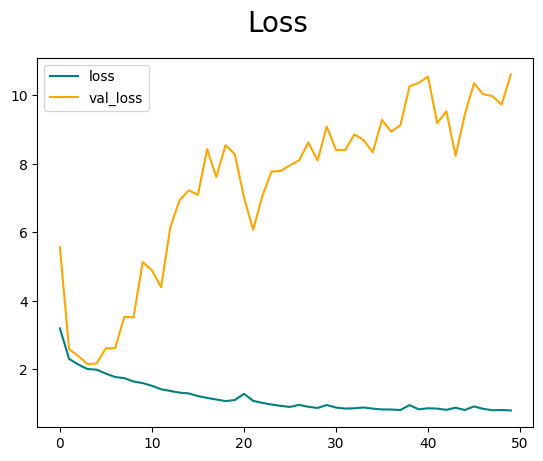

In [ ]:
# Plotting Model Loss Performance
fig = plt.figure()
plt.plot(hist_1.history['loss'], color='teal', label='loss')
plt.plot(hist_1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

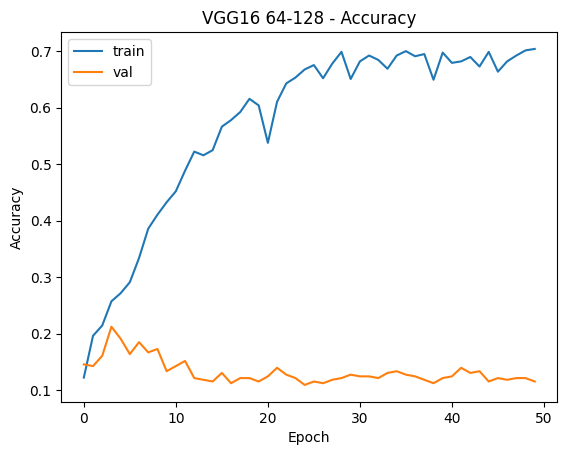

In [ ]:
# Plot the accuracy curves for the training and validation sets
plt.plot(hist_1.history['accuracy'], label='train')
plt.plot(hist_1.history['val_accuracy'], label='val')
plt.title('VGG16 64-128 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_12=model_1(5,32,0.5)
hist_1_2 = model_12.fit(X_train, y_train, epochs= 50, validation_data= (X_test,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 16)        1216      
                                                                 
 batch_normalization_3 (Batc  (None, 96, 96, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 96, 96, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 batch_normalization_4 (Batc  (None, 44, 44, 32)      

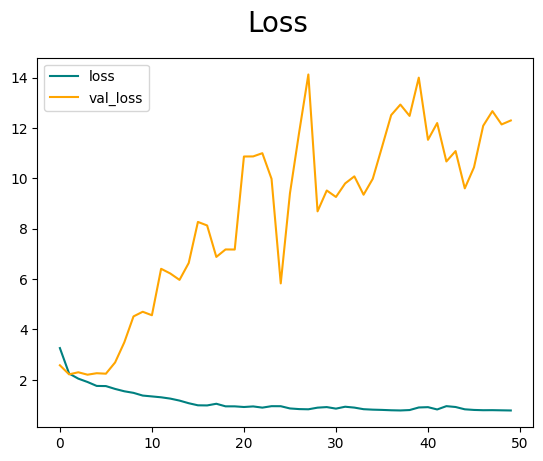

In [ ]:
# Plotting Model Loss Performance
fig = plt.figure()
plt.plot(hist_1_2.history['loss'], color='teal', label='loss')
plt.plot(hist_1_2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

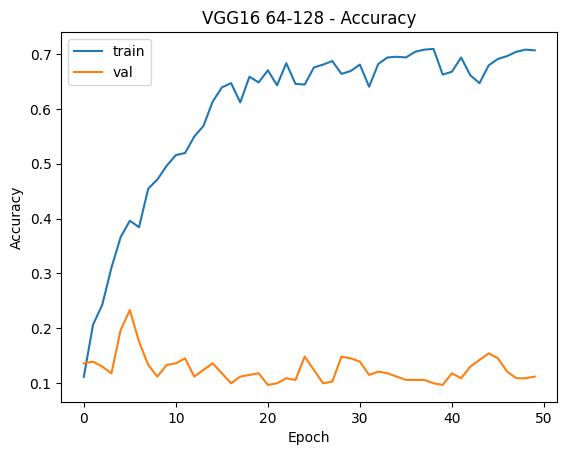

In [ ]:
# Plot the accuracy curves for the training and validation sets
plt.plot(hist_1_2.history['accuracy'], label='train')
plt.plot(hist_1_2.history['val_accuracy'], label='val')
plt.title('VGG16 64-128 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate
loss, accuracy = model_11.evaluate(X_test, y_test)
print('Model 1.1 (Filter changed) - Test loss:', loss)
print('Model 1.1 - (Filter changed):', accuracy)

loss, accuracy = model_12.evaluate(X_test, y_test)
print('Model 1.2 (Filter changed) - Test loss:', loss)
print('Model 1.2 - (Filter changed):', accuracy)


11/11 [==============================] - 1s 81ms/step - loss: 10.6109 - accuracy: 0.1152
Model 1.1 (Filter changed) - Test loss: 10.610871315002441
Model 1.1 - (Filter changed): 0.11515151709318161
11/11 [==============================] - 1s 114ms/step - loss: 12.2978 - accuracy: 0.1121
Model 1.2 (Filter changed) - Test loss: 12.297760963439941
Model 1.2 - (Filter changed): 0.11212120950222015


In [ ]:
def model_2():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape =  (resize_limit, resize_limit, channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    

    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10, activation = "softmax"))

    model.summary()
    model.compile(optimizer= 'adam', loss= tf.losses.categorical_crossentropy, metrics = ['accuracy'] )
    return model

In [ ]:
model_21=model_2()
hist_21 = model_21.fit(X_train, y_train, epochs= 50, validation_data= (X_test,y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 96)        55392     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 96)      

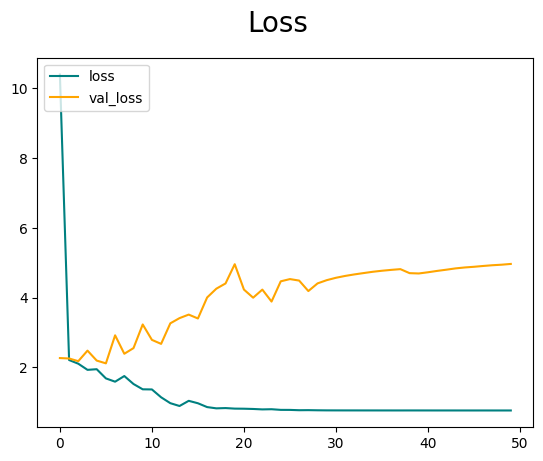

In [ ]:
# Plotting Model Loss Performance
fig = plt.figure()
plt.plot(hist_21.history['loss'], color='teal', label='loss')
plt.plot(hist_21.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

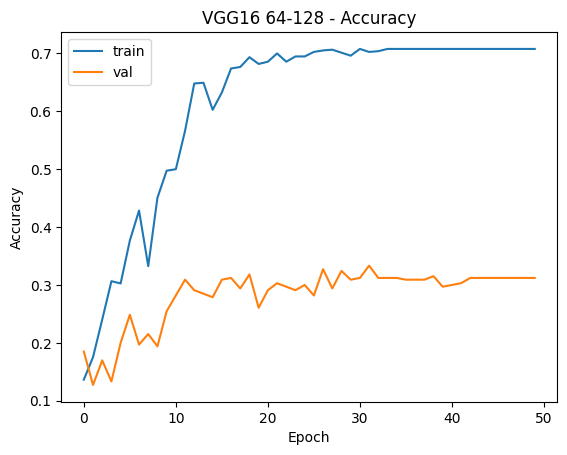

In [ ]:
# Plot the accuracy curves for the training and validation sets
plt.plot(hist_21.history['accuracy'], label='train')
plt.plot(hist_21.history['val_accuracy'], label='val')
plt.title('VGG16 64-128 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_22=model_2()
hist_22 = model_22.fit(X_train, y_train, epochs= 50, validation_data= (X_test,y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 25, 25, 96)        55392     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 96)      

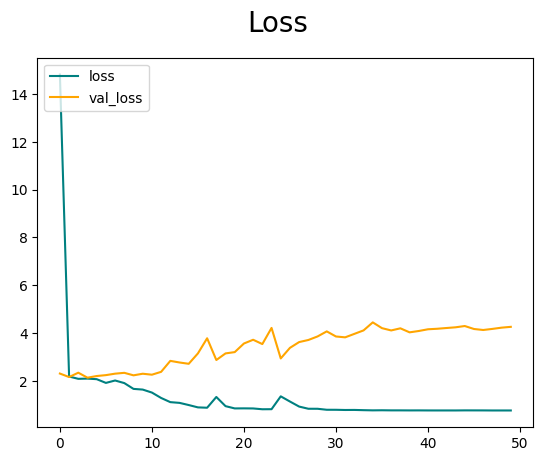

In [ ]:
# Plotting Model Loss Performance
fig = plt.figure()
plt.plot(hist_22.history['loss'], color='teal', label='loss')
plt.plot(hist_22.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

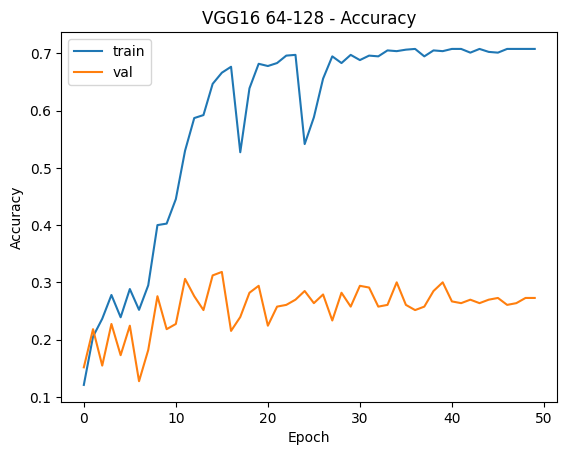

In [ ]:
# Plot the accuracy curves for the training and validation sets
plt.plot(hist_22.history['accuracy'], label='train')
plt.plot(hist_22.history['val_accuracy'], label='val')
plt.title('VGG16 64-128 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate
loss, accuracy = model_21.evaluate(X_test, y_test)
print('Model 2.1 (Kernal changed) - Test loss:', loss)
print('Model 2.1 - (Kernal changed):', accuracy)

loss, accuracy = model_22.evaluate(X_test, y_test)
print('Model 2.2 (Kernal changed) - Test loss:', loss)
print('Model 2.2 - (Kernal changed):', accuracy)

11/11 [==============================] - 4s 339ms/step - loss: 4.9629 - accuracy: 0.3121
Model 2.1 (Kernal changed) - Test loss: 4.962935924530029
Model 2.1 - (Kernal changed): 0.3121212124824524
11/11 [==============================] - 2s 179ms/step - loss: 4.2654 - accuracy: 0.2727
Model 2.2 (Kernal changed) - Test loss: 4.265392303466797
Model 2.2 - (Kernal changed): 0.27272728085517883


Of all the models created above, the model_22 has performed better. In our validation, we notice a high sense of overfitting. Even with 70%-30% split, we see that the accuracy difference between train set and test is huge. This may be because of the dataset! We only have 733 rows on a whole!   

In [ ]:
def mlp():
    model = Sequential()
    model.add(Flatten(input_shape=(resize_limit, resize_limit, channels)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.summary()
    model.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])
    return model

In [ ]:
model_mlp=mlp()
hist_mlp = model_mlp.fit(X_train, y_train, epochs= 50, validation_data= (X_test,y_test))

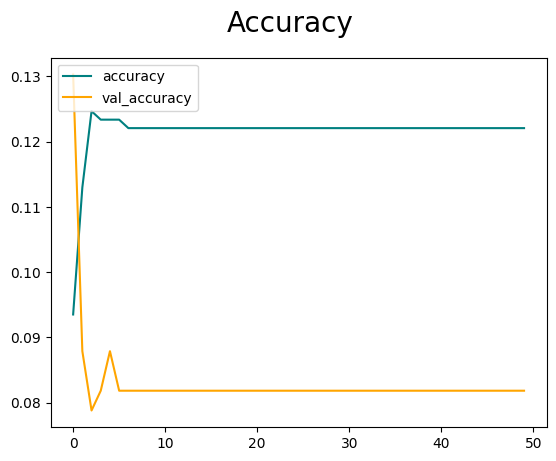

In [ ]:
# Plotting Model Accuracy Performance
fig = plt.figure()
plt.plot(hist_mlp.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_mlp.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test, labels='auto'):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title('MLP: '+str(acc_mlp))

11/11 [==============================] - 1s 60ms/step


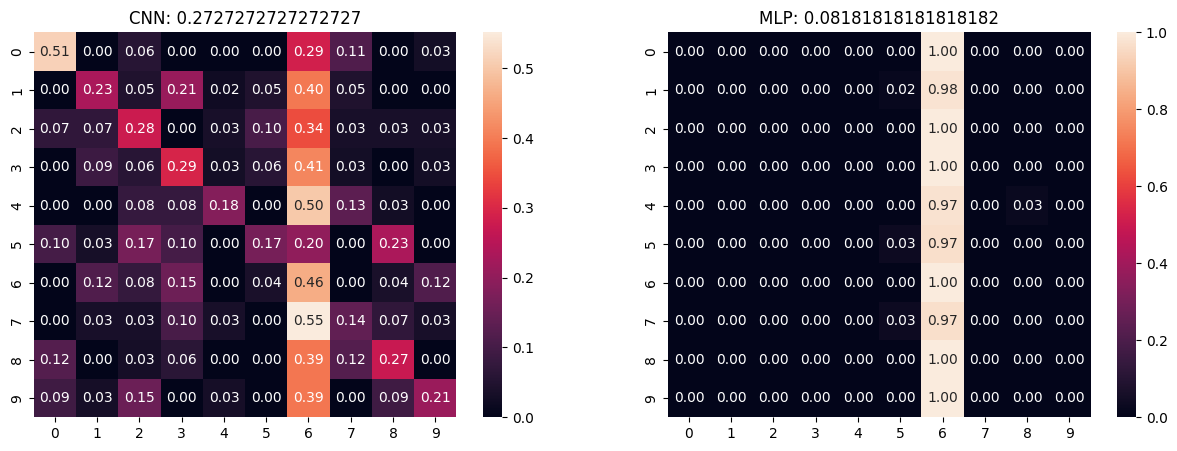

In [ ]:
compare_mlp_cnn(model_22,model_mlp,X_test,new_y_test)

11/11 [==============================] - 0s 29ms/step


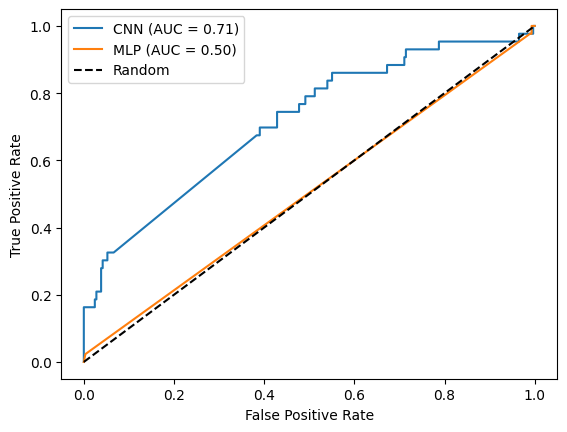

In [ ]:
from sklearn.metrics import roc_curve, auc

# Evaluate CNN model
y_pred_cnn = model_22.predict(X_test)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test[:, 1], y_pred_cnn[:, 1])
auc_cnn = auc(fpr_cnn, tpr_cnn)

# Evaluate MLP model
y_pred_mlp = model_mlp.predict(X_test)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test[:, 1], y_pred_mlp[:, 1])
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = {:.2f})'.format(auc_cnn))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = {:.2f})'.format(auc_mlp))
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In the comparison between MLP and CNN, the CNN model22 is performing better than MLP.

In [ ]:
from keras.applications import VGG16

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_wh,img_wh , 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained base model
model_pre = Sequential()
model_pre.add(base_model)
# model_pre.add(model_2())
# hist_22 = model_22.fit(X_train, y_train, epochs= 50, validation_data= (X_test,y_test))
# model_pre.add(Dense(256, activation='relu'))
# model_pre.add(Dense(10, activation='softmax')) 
# model = Sequential()
model_pre.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape =  (resize_limit, resize_limit, channels)))
model_pre.add(MaxPooling2D(pool_size=(2,2)))


model_pre.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model_pre.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model_pre.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model_pre.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_pre.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model_pre.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_pre.add(Flatten())
model_pre.add(Dense(512))
model_pre.add(Activation('relu'))
model_pre.add(Dense(10, activation = "softmax"))

model_pre.summary()
model_pre.compile(optimizer= 'adam', loss= tf.losses.categorical_crossentropy, metrics = ['accuracy'] )

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 32)          147488    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 1, 1, 96)          55392     
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 96)          

In [44]:
model_pretrain = model_pre.fit(X_train, y_train, epochs= 50, validation_data= (X_test,y_test))

Epoch 1/50
25/25 [==============================] - 133s 5s/step - loss: 2.1478 - accuracy: 0.2104 - val_loss: 1.7941 - val_accuracy: 0.3303
Epoch 2/50
25/25 [==============================] - 131s 5s/step - loss: 1.4877 - accuracy: 0.4714 - val_loss: 1.4669 - val_accuracy: 0.4667
Epoch 3/50
25/25 [==============================] - 130s 5s/step - loss: 1.1030 - accuracy: 0.5935 - val_loss: 1.4117 - val_accuracy: 0.5212
Epoch 4/50
25/25 [==============================] - 129s 5s/step - loss: 0.9023 - accuracy: 0.6636 - val_loss: 1.3760 - val_accuracy: 0.5485
Epoch 5/50
25/25 [==============================] - 130s 5s/step - loss: 0.8986 - accuracy: 0.6688 - val_loss: 1.4184 - val_accuracy: 0.5242
Epoch 6/50
25/25 [==============================] - 131s 5s/step - loss: 0.8341 - accuracy: 0.6844 - val_loss: 1.4256 - val_accuracy: 0.5727
Epoch 7/50
25/25 [==============================] - 130s 5s/step - loss: 0.8256 - accuracy: 0.6831 - val_loss: 1.4025 - val_accuracy: 0.5424
Epoch 8/50
25

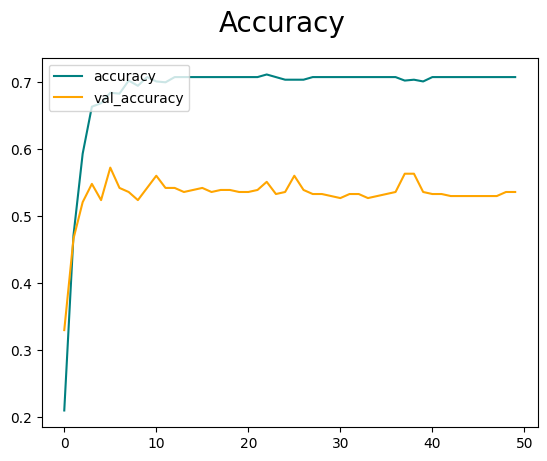

In [45]:
# Plotting Model Accuracy Performance
fig = plt.figure()
plt.plot(model_pretrain.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_pretrain.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
model_pretrain.history['val_accuracy']

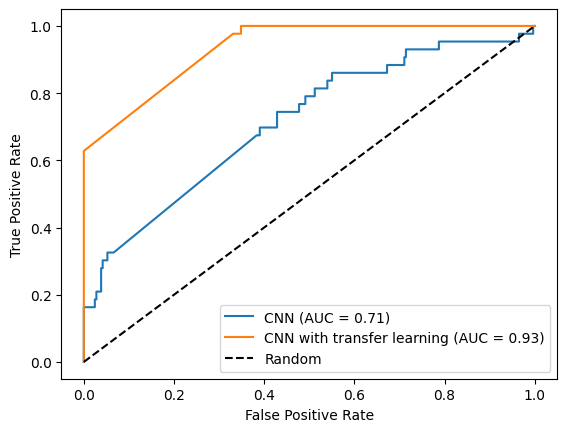

In [51]:
# Evaluate CNN model
y_pred_cnn = model_22.predict(X_test)
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test[:, 1], y_pred_cnn[:, 1])
auc_cnn = auc(fpr_cnn, tpr_cnn)

# Evaluate transfer learnings model
y_pred_mlp = model_pre.predict(X_test)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test[:, 1], y_pred_mlp[:, 1])
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = {:.2f})'.format(auc_cnn))
plt.plot(fpr_mlp, tpr_mlp, label='CNN with transfer learning (AUC = {:.2f})'.format(auc_mlp))
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The CNN with transfer learning has a better AUC than the CNN model22. We see a significant improvement on the test set accuracy. With more training data, this model would perform really good. 

For this data, when compared with all the above models, the CNN model 22 with transfer learning from VGG16 is better fit.